In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

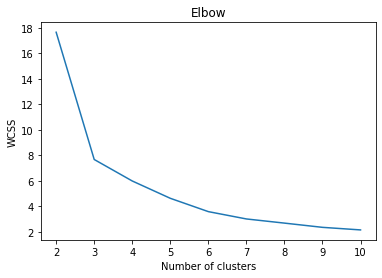

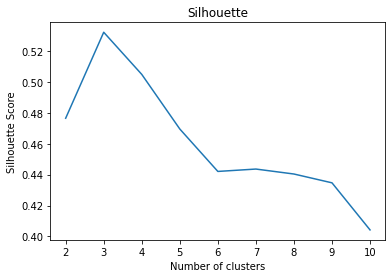

In [3]:
full_data = pd.read_csv("./CalculatedData/full_data.csv", low_memory=False)
full_origin = pd.read_csv("./CalculatedData/full_origin.csv", low_memory=False)

X = full_data.iloc[:, -4:-1]
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), wcss)
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Calinski

In [26]:
labels = kmeans.labels_
 
print(metrics.calinski_harabasz_score(X, labels))

652.2044418374999


In [27]:
X = full_data.iloc[:, -4:-1]

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(X)
cluster = kmeans.n_clusters
labels = kmeans.labels_

In [1]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# from sklearn.cluster import KMeans

# X = full_data.iloc[:, -4:-1]

# kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(X)
# labels = kmeans.labels_

# unique_labels = np.unique(labels)
# colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# for k, col in zip(unique_labels, colors):
#     class_member_mask = (labels == k)
#     xyz = X[class_member_mask]
#     ax.scatter(xyz.iloc[:, 0], xyz.iloc[:, 1], xyz.iloc[:, 2], c=[tuple(col)], s=50, edgecolor='k')

# ax.set_title('3D Scatter Plot of Clusters')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# plt.show()